In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geemap,ee

In [2]:
ee.Authenticate()
ee.Initialize(project='ee-benja3525')

C:\Users\benji\AppData\Local\Temp\ipykernel_8224\3308869618.py:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  ys = ys.unary_union


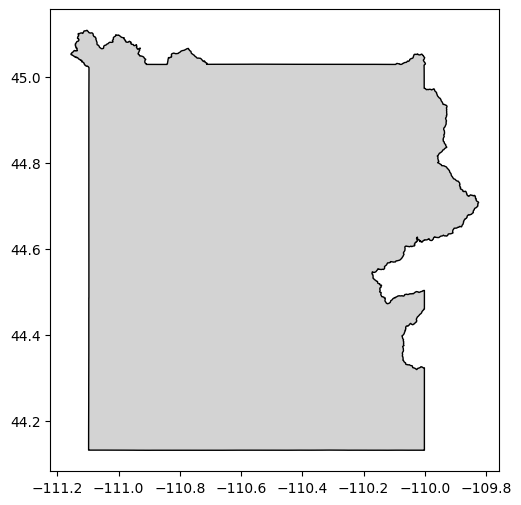

In [3]:
ys = gpd.read_file('YELL_tracts/YELL_tracts.shp')
ys = ys.to_crs('EPSG:4326')
ys = ys.unary_union
ys = gpd.GeoDataFrame(geometry=[ys], crs='EPSG:4326')
aoi = geemap.gdf_to_ee(ys)

centro = [44.952205, -110.496154]

fig, ax = plt.subplots(figsize=(6, 6))
ys.plot(ax=ax, edgecolor='black', facecolor='lightgray')
plt.show()

In [4]:
def apply_scale_factors_1(image):
    lst = image.select('ST_B6').multiply(0.00341802).add(149.0).subtract(273.15) #usa B6
    return image.addBands(lst.rename('LST_C'))

def apply_scale_factors_2(image):
    lst = image.select('ST_B10').multiply(0.00341802).add(149.0).subtract(273.15)
    return image.addBands(lst.rename('LST_C'))

In [5]:
collection_1 = (ee.ImageCollection('LANDSAT/LT05/C02/T1_L2')
    .filterBounds(aoi).filterDate('2001-01-01', '2013-01-01').select('ST_B6'))

mean_temp_1 = collection_1.map(apply_scale_factors_1).select('LST_C').mean().clip(aoi)
print("Imágenes recuperadas con Landsat 5:", len(collection_1.aggregate_array('system:id').getInfo()))

Imágenes recuperadas con Landsat 5: 777


In [6]:
collection_2 = (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
              .filterBounds(aoi).filterDate('2013-01-01', '2024-01-31').select('ST_B10'))

mean_temp_2 = collection_2.map(apply_scale_factors_2).select('LST_C').mean().clip(aoi)
print("Imágenes recuperadas con Landsat 8:", len(collection_2.aggregate_array('system:id').getInfo()))

Imágenes recuperadas con Landsat 8: 1160


In [7]:
vis_params = {'min': -10, 'max': 10, 'palette': ['blue', 'cyan', 'green', 'yellow', 'red']}
Map = geemap.Map(center=centro, zoom=10)
Map.addLayer(mean_temp_1, vis_params, 'Media 1984-2013 Landsat 5', shown=True)
Map.addLayer(mean_temp_2, vis_params, 'Media 2013-2024 Landsat 8', shown=False)
Map.addLayer(aoi, {}, 'aoi', shown=False)
Map.add_colorbar(vis_params, label='Brightness Temperature (°C)')
Map

Map(center=[44.952205, -110.496154], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Se…

In [9]:
geemap.ee_export_image(
    mean_temp_1,
    filename='mean_temp_2001_2013.tif',
    scale=90,
    region=aoi.geometry(),
    file_per_band=False
)

geemap.ee_export_image(
    mean_temp_2,
    filename='mean_temp_2013_2024.tif',
    scale=90,
    region=aoi.geometry(),
    file_per_band=False
)


Generating URL ...
Please wait ...
Data downloaded to c:\Users\benji\Documents\VSProjects\Geoespaciales\p\mean_temp_2001_2013.tif
Generating URL ...
Please wait ...
An error occurred while downloading.
